<a href="https://colab.research.google.com/github/eduion/hw/blob/main/genetic_algorithm/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import random
import matplotlib.pyplot as plt
#背包資訊
weights = [41, 50, 49, 59, 55, 57, 60]
profits = [442, 525, 511, 593, 546, 564, 617]
max_weight = 170
population_size = 50
mutation_rate = 0.1 #0換1或1換0的機率
max_generation = 100 #迭代100次

def initialize_population(): # 隨機生成50個初始解，且重量不超過限制重量
  population = []
  for i in range(population_size):
    while True:
      individual = [random.randint(0,1) for x in range(len(weights))]
      if evaluate(individual)>-1:
        population.append(individual)
        break
  return population
def evaluate(solution): #計算當前的profit
  total_weight = 0
  total_profit = 0
  for i in range(len(solution)):
    if solution[i] == 1:
      total_weight = total_weight + weights[i]
      total_profit = total_profit + profits[i]
  if total_weight > max_weight:
    return -1 #超重profit設為-1
  else:
    return total_profit
  return total_profit,total_weight

def select_parents(population): #輪盤法選擇父母個體，profit越高被選中的機率越大
  total_fitness = 0 #total profit
  for individual in population:
    total_fitness = total_fitness + evaluate(individual)
  roulette_wheel = []
  cumulative_probability = 0
  for individual in population:
    fitness = evaluate(individual)
    probability = fitness/total_fitness
    cumulative_probability = cumulative_probability + probability #做成輪盤
    roulette_wheel.append((individual,cumulative_probability))
  parent = []
  while len(parent)<2:
    rand = random.random() #隨機生成0-1的數去選擇parent
    for individual,cumulative_probaility in roulette_wheel:
      if rand<=cumulative_probaility:
        parent.append(individual)
        break
  return parent

In [82]:
def crossover(parent1,parent2): #基因互換
  crossover_point = random.randint(1,len(parent1)-1) #隨機互換的點
  child1 = parent1[:crossover_point]+parent2[crossover_point:]
  child2 = parent2[:crossover_point]+parent1[crossover_point:]
  return child1,child2

def mutate(solution):#隨機把陣列的0換1，1換0
  for i in range(len(solution)):
    if random.random() < mutation_rate:
      if solution[i]==0:
        solution[i]=1
      else:
        solution[i]=0
  return solution

In [83]:
def max_profit(solution,population,record_profit): #找最大的profit
  generate_solution = population[0].copy()
  best_profit = evaluate(population[0])
  for i in range(1,len(population)): #從目前generate找最大的profit出來，再跟所有generate的最大profit比
    if evaluate(population[i])>best_profit:
      generate_solution = population[i].copy()
      best_profit = evaluate(population[i])
  if len(record_profit)==0:
    record_profit.append(best_profit)
    solution = generate_solution.copy()
  else:
    tmp = record_profit[len(record_profit)-1]
    if tmp >=best_profit:
      record_profit.append(tmp)
    else:
      record_profit.append(best_profit)
      solution = generate_solution.copy()
  return solution

In [84]:
def genetic_algorithm():
  record_profit = []
  solution = None #最佳解
  population = initialize_population() #隨機生成50個初始解
  solution = max_profit(solution,population,record_profit)
  for generation in range(max_generation): #迭代100次，每次都要選擇新的parents
    parents = select_parents(population)
    offspring = []
    while len(offspring)<population_size: #要生成population_size個child
      child1,child2 = crossover(parents[0],parents[1])
      offspring.append(mutate(child1))
      offspring.append(mutate(child2))
    population  = offspring.copy()
    solution = max_profit(solution,population,record_profit)
  # 迭代100次後找最大的profit
  return solution,record_profit

最佳解: [0, 1, 0, 1, 0, 0, 1]
最佳profit: 1735


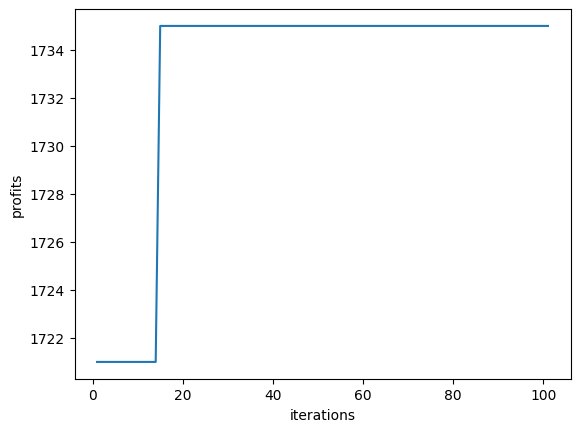

In [85]:
solution,record_profit = genetic_algorithm()
print("最佳解:",solution)
print("最佳profit:",record_profit[len(record_profit)-1])
plt.plot(range(1,max_generation+2),record_profit)
plt.xlabel("iterations")
plt.ylabel('profits')
plt.show()